In [160]:
import pandas as pd
import numpy as np
#
train = pd.read_csv("../data/input/train.csv")
test = pd.read_csv("../data/input/test.csv")

In [98]:
score = train["Score"]
test_id = test["ID"]
del train["Score"],test["ID"],train["ID"]

KeyError: 'Score'

In [99]:
int_c = train.columns[train.dtypes == int]
float_c = train.columns[train.dtypes == float]

In [100]:
int_train,int_test = train[int_c],test[int_c]
fl_train,fl_test = train[float_c],test[float_c]

In [101]:
fl_data = fl_train.append(fl_test)

In [102]:
### float 前処理

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
fl_data = fl_train.append(fl_test)
train,test = fl_data.iloc[:13731,:],fl_data.iloc[13731:,:]

#分散＝０
constant = []
for col in train.columns:
    if col != "Score" or col != "ID":
        if train[col].std() == 0:
            constant.append(col)
train1 = train.drop(columns=constant,axis=1)
test1 = test.drop(columns=constant,axis=1)
# カテゴリ minが300以下なら排除
col=[]
for c in tqdm(train1.columns):
    if len(np.unique(train1[c])) == 2:
        if min(train1[c].value_counts()) <= 300:
            col.append(c)
    if train1[c].dtypes == float and len(np.unique(train1[c])) < 3:
        col.append(c)
train1.drop(col,axis = 1, inplace=True)
test1.drop(col,axis = 1, inplace=True)
            
#ダブり
aa = []
for i in tqdm(train1.columns):
    if train1[i].dtype != "object":
        aa.append(i)
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)

#分散
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
sel.fit(train1)
f = train1.columns[sel.get_support()].values
train1 = train1[f]
test1 = test[f]


from scipy.stats import ks_2samp
list_p_value =[]

for i in tqdm(train1.columns):
    list_p_value.append(ks_2samp(test1[i] , train1[i])[1])

Se = pd.Series(list_p_value, index = train1.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)
train1.drop(list_discarded,axis=1,inplace=True)
test1.drop(list_discarded,axis=1,inplace=True)
#相関係数
corr = set()
corr_matrix = train1.corr()
for i in tqdm(range(len(corr_matrix.columns))):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            corr.add(corr_matrix.columns[i])
train1.drop(corr,axis=1,inplace=True)
test1.drop(corr,axis=1,inplace=True)

fl_train,fl_test = train1,test1




  0%|          | 0/2340 [00:00<?, ?it/s]


  2%|▏         | 36/2340 [00:00<00:06, 355.80it/s]


  3%|▎         | 68/2340 [00:00<00:06, 343.17it/s]


  4%|▍         | 102/2340 [00:00<00:06, 341.47it/s]


  6%|▌         | 140/2340 [00:00<00:06, 349.85it/s]


  8%|▊         | 182/2340 [00:00<00:05, 367.28it/s]


  9%|▉         | 222/2340 [00:00<00:05, 376.34it/s]


 11%|█         | 263/2340 [00:00<00:05, 385.83it/s]


 13%|█▎        | 309/2340 [00:00<00:05, 403.73it/s]


 15%|█▌        | 354/2340 [00:00<00:04, 415.46it/s]


 17%|█▋        | 403/2340 [00:01<00:04, 434.06it/s]


 19%|█▉        | 446/2340 [00:01<00:04, 430.50it/s]


 21%|██        | 495/2340 [00:01<00:04, 443.70it/s]


 23%|██▎       | 540/2340 [00:01<00:04, 430.43it/s]


 25%|██▍       | 584/2340 [00:01<00:04, 425.91it/s]


 27%|██▋       | 627/2340 [00:01<00:04, 410.69it/s]


 29%|██▊       | 669/2340 [00:01<00:04, 398.16it/s]


 31%|███       | 714/2340 [00:01<00:03, 411.21it/s]


 32%|███▏      | 756/2340 [00:01<00:03

In [104]:
#int drop
train,test = int_train,int_test
#分散＝０
constant = []
for col in train.columns:
    if col != "Score" or col != "ID":
        if train[col].std() == 0:
            constant.append(col)
train1 = train.drop(columns=constant,axis=1)
test1 = test.drop(columns=constant,axis=1)


# カテゴリ minが300以下なら排除
col=[]
for c in tqdm(train1.columns):
    if len(np.unique(train1[c])) == 2:
        if min(train1[c].value_counts()) <= 300:
            col.append(c)
    if train1[c].dtypes == float and len(np.unique(train1[c])) < 3:
        col.append(c)
        
    if train1[c].value_counts().max()/len(train1) > 0.92:
        col.append(c)
train1.drop(col,axis = 1, inplace=True)
test1.drop(col,axis = 1, inplace=True)
            
#ダブり
aa = []
for i in tqdm(train1.columns):
    if train1[i].dtype != "object":
        aa.append(i)
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)
int_train,int_test = train1,test1




  0%|          | 0/1411 [00:00<?, ?it/s]


  4%|▍         | 56/1411 [00:00<00:02, 557.71it/s]


  8%|▊         | 111/1411 [00:00<00:02, 554.20it/s]


 12%|█▏        | 163/1411 [00:00<00:02, 541.06it/s]


 16%|█▌        | 220/1411 [00:00<00:02, 545.58it/s]


 20%|█▉        | 282/1411 [00:00<00:02, 562.90it/s]


 24%|██▍       | 342/1411 [00:00<00:01, 572.27it/s]


 28%|██▊       | 401/1411 [00:00<00:01, 576.53it/s]


 32%|███▏      | 458/1411 [00:00<00:01, 573.29it/s]


 37%|███▋      | 520/1411 [00:00<00:01, 584.98it/s]


 41%|████      | 577/1411 [00:01<00:01, 562.95it/s]


 45%|████▍     | 632/1411 [00:01<00:01, 515.68it/s]


 48%|████▊     | 684/1411 [00:01<00:01, 512.44it/s]


 52%|█████▏    | 740/1411 [00:01<00:01, 523.89it/s]


 56%|█████▌    | 793/1411 [00:01<00:01, 519.98it/s]


 60%|█████▉    | 846/1411 [00:01<00:01, 500.10it/s]


 64%|██████▎   | 897/1411 [00:01<00:01, 496.94it/s]


 68%|██████▊   | 953/1411 [00:01<00:00, 512.63it/s]


 71%|███████   | 1005/1411 [00:01<00:

In [105]:
int_data = int_train.append(int_test)
cate_c = []
for i in int_data.columns:
    a = int_data[i].value_counts().keys().values
    aa = np.arange(min(a),max(a) + 1)
    if len(set(a)) == len(aa):
        cate_c.append(i)


In [106]:
category_train = int_train[cate_c]
category_test = int_test[cate_c]
int_train.drop(cate_c,axis = 1,inplace=True)
int_test.drop(cate_c,axis = 1,inplace=True)

In [107]:
int_data = int_train.append(int_test)
cate_data = category_train.append(category_test)

In [108]:
def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]
    return pd.DataFrame(add_df,columns=add_columns)

In [109]:
from sklearn.preprocessing import StandardScaler
fl_data = fl_train.append(fl_test)
num_data = df_concat([fl_data, int_data])
stdsc = StandardScaler()
tr,te = num_data.iloc[:13731,:],num_data.iloc[13731:,:]
tr_std= stdsc.fit_transform(tr)
# 訓練用データを基準にテストデータも標準化
te_std = stdsc.transform(te)


In [122]:
#submit = df_concat([pd.DataFrame(np.r_[tr_std,te_std],columns=num_data.columns),cate_data])
submit = df_concat([num_data,cate_data])

In [183]:
kbest_c = col[1:]

In [185]:
tr,te = submit.loc[:13730,kbest_c],submit.loc[13731:,kbest_c]
tr["Score"] = score
te["ID"] = test_id.values
tr = tr.reset_index()
te = te.reset_index()
tr.to_feather("../data/input/tr_separate_type4.feather")
te.to_feather("../data/input/te_separate_type4.feather")

In [13]:
## float feature engenering

data = fl_train.append(fl_test)

imp_float_col = ['col329', 'col2431', 'col226', 'col2614', 'col3552', 'col2621', 'col3277', 'col420', 'col176', 'col248', 'col119', 'col381',       'col3642', 'col46', 'col253', 'col1174', 'col552', 'col71',
       'col3653', 'col1306', 'col1815', 'col913', 'col1094', 'col44','col130', 'col441', 'col3431', 'col48', 'col3474', 'col2989',
       'col1050', 'col113', 'col56', 'col1252', 'col15', 'col209','col1011', 'col99', 'col1632', 'col3194', 'col124', 'col2834',
       'col398', 'col68', 'col3063', 'col104', 'col723', 'col904','col2537', 'col945', 'col1731', 'col1279', 'col1315', 'col743']

from tqdm import tqdm


def interact_encoding(data,f):
    new = pd.DataFrame()
    for i in tqdm(range(len(f))):
        for j in range(i):
            c,cc = f[i],f[j]
            new["add_" + c +"_"+ cc ] = data[c].values + data[cc].values
            new["minus_" + c +"_"+ cc ] = data[c].values- data[cc].values
            new["dot_" + c +"_"+ cc ] = data[c].values*data[cc].values
    return new

FE1_f = interact_encoding(data,imp_float_col)

def float_data_st(data):
    
    new = pd.DataFrame()
    c = data.columns[data.dtypes == float]

    new["mean_float"] = data[c].mean(axis = 1)
    new["var_float"] = data[c].var(axis = 1)
    new["std_float"] = data[c].std(axis = 1)
    new["max_float"] = data[c].max(axis = 1)
    new["min_float"] = data[c].min(axis = 1)

    return new
FE2_f = float_data_st(data)

def add_IncreaseAgg(data,st):
    threshold = 21
    new = pd.DataFrame()
    new_arr = np.zeros((data.shape[0],data.shape[1]))
    for i in tqdm(range(len(data))):
        tmp = data.iloc[i,:]
        tmp = tmp[tmp>0]
        _dict = dict(sorted(dict(tmp).items(), key=lambda x: x[1]))
        tmp = tmp[list(_dict.keys())]
        if len(tmp) > 0:
            new_arr[i,:len(tmp)] = tmp
    col = [f"FE4_{st}{i}" for i in range(threshold)]
    new = pd.DataFrame(new_arr[:,:threshold],columns=col)
    for i in tqdm(range(len(data))):
        tmp0 = new_arr[i,:threshold]
        tmp1 = new_arr[i,threshold:]
        tmp2 = new_arr[i,:]
        
        new.loc[i,f'{st}_sum_Increase'] = tmp2[tmp2 == 0].sum()
        new.loc[i,f'{st}_mean_Increase'] = tmp1.mean()
        new.loc[i,f'{st}_std_Increase'] = tmp1.std()
        new.loc[i,f'{st}_var_Increase'] =  tmp1.var()
        new.loc[i,f'{st}_max_Increase_af'] =  tmp1.max()
        new.loc[i,f'{st}_min_Increase_af'] =  tmp1.min()
        new.loc[i,f'{st}_max_Increase_be'] =  tmp0.max()
        new.loc[i,f'{st}_min_Increase_be'] =  tmp0.min()
    return new
FE3_f= add_IncreaseAgg(data,"float")

def add_DecreaseAgg(data,st):
    threshold = 21
    new = pd.DataFrame()
    new_arr = np.zeros((data.shape[0],data.shape[1]))
    for i in tqdm(range(len(data))):
        tmp = data.iloc[i,:]
        tmp = tmp[tmp>0]
        _dict = dict(sorted(dict(tmp).items(), key=lambda x: -x[1]))
        tmp = tmp[list(_dict.keys())]
        if len(tmp) > 0:
            new_arr[i,:len(tmp)] = tmp
        
    col = [f"FE3_{st}{i}" for i in range(threshold)]
    new = pd.DataFrame(new_arr[:,:threshold],columns=col)
    for i in tqdm(range(len(data))):
        tmp0 = new_arr[i,:threshold]
        tmp1 = new_arr[i,threshold:]
        tmp2 = new_arr[i,:]
        
        new.loc[i,f'{st}_sum_Decrease'] = tmp2[tmp2 == 0].sum()
        new.loc[i,f'{st}_mean_Decrease'] = tmp1.mean()
        new.loc[i,f'{st}_std_Decrease'] = tmp1.std()
        new.loc[i,f'{st}_var_Decrease'] =  tmp1.var()
        new.loc[i,f'{st}_max_Decrease_af'] =  tmp1.max()
        new.loc[i,f'{st}_min_Decrease_af'] =  tmp1.min()
        new.loc[i,f'{st}_max_Decrease_be'] =  tmp0.max()
        new.loc[i,f'{st}_min_Decrease_be'] =  tmp0.min()
    return new
FE4_f= add_DecreaseAgg(data,"float")

add_float_FE = df_concat([FE1_f,FE2_f,FE3_f,FE4_f])
del FE1_f,FE2_f,FE3_f,FE4_f

100%|██████████| 27463/27463 [00:47<00:00, 574.68it/s]


In [14]:
# int feature enginiring

data = int_data

def best_importance_col(data,imp_c):
    new = pd.DataFrame()
    flist = [x for x in data.columns if (data[x].dtypes == int) and (len(np.unique(data[x])) != 2) ]
    for c in tqdm(flist):
        new["add_" + imp_c +"_"+ c ] = data[imp_c]+ data[c]
        new["minus_" + imp_c +"_"+ c ] = data[imp_c]- data[c]
        new["dot_" + imp_c +"_"+ c ] = data[imp_c]*data[c]
    return new
FE1_i = best_importance_col(data,"col88")

def add_UniqAgg(data,st):
    threshold = 21
    new_arr = np.zeros((data.shape[0],data.shape[1]))
    for i in tqdm(range(len(data))):
        tmp = np.unique(data.iloc[i,:])
        tmp = tmp[tmp>0]
        if len(tmp) > 0:
            new_arr[i,:len(tmp)] = tmp
            
    col = [f"FE1_{st}{i}" for i in range(threshold)]
    new = pd.DataFrame(new_arr[:,:threshold],columns=col)
    for i in tqdm(range(len(data))):
        tmp0 = new_arr[i,:threshold]
        tmp1 = new_arr[i,threshold:]
        tmp2 = new_arr[i,:]
        
        new.loc[i,f'{st}_sum_Uniq'] = tmp2[tmp2 == 0].sum()
        new.loc[i,f'{st}_mean_Uniq'] = tmp1.mean()
        new.loc[i,f'{st}_std_Uniq'] = tmp1.std()
        new.loc[i,f'{st}_var_Uniq'] =  tmp1.var()
        new.loc[i,f'{st}_max_Uniq_af'] =  tmp1.max()
        new.loc[i,f'{st}_min_Uniq_af'] =  tmp1.min()
        new.loc[i,f'{st}_max_Uniq_be'] =  tmp0.max()
        new.loc[i,f'{st}_min_Uniq_be'] =  tmp0.min()
    
    return new
FE2_i = add_UniqAgg(data,"int")

def add_IncreaseAgg(data,st):
    threshold = 21
    new = pd.DataFrame()
    new_arr = np.zeros((data.shape[0],data.shape[1]))
    for i in tqdm(range(len(data))):
        tmp = data.iloc[i,:]
        tmp = tmp[tmp>0]
        _dict = dict(sorted(dict(tmp).items(), key=lambda x: x[1]))
        tmp = tmp[list(_dict.keys())]
        if len(tmp) > 0:
            new_arr[i,:len(tmp)] = tmp
    col = [f"FE4_{st}{i}" for i in range(threshold)]
    new = pd.DataFrame(new_arr[:,:threshold],columns=col)
    for i in tqdm(range(len(data))):
        tmp0 = new_arr[i,:threshold]
        tmp1 = new_arr[i,threshold:]
        tmp2 = new_arr[i,:]
        
        new.loc[i,f'{st}_sum_Increase'] = tmp2[tmp2 == 0].sum()
        new.loc[i,f'{st}_mean_Increase'] = tmp1.mean()
        new.loc[i,f'{st}_std_Increase'] = tmp1.std()
        new.loc[i,f'{st}_var_Increase'] =  tmp1.var()
        new.loc[i,f'{st}_max_Increase_af'] =  tmp1.max()
        new.loc[i,f'{st}_min_Increase_af'] =  tmp1.min()
        new.loc[i,f'{st}_max_Increase_be'] =  tmp0.max()
        new.loc[i,f'{st}_min_Increase_be'] =  tmp0.min()
    return new
FE3_i = add_IncreaseAgg(data,"int")

def add_DecreaseAgg(data,st):
    threshold = 21
    new = pd.DataFrame()
    new_arr = np.zeros((data.shape[0],data.shape[1]))
    for i in tqdm(range(len(data))):
        tmp = data.iloc[i,:]
        tmp = tmp[tmp>0]
        _dict = dict(sorted(dict(tmp).items(), key=lambda x: -x[1]))
        tmp = tmp[list(_dict.keys())]
        if len(tmp) > 0:
            new_arr[i,:len(tmp)] = tmp
        
    col = [f"FE3_{st}{i}" for i in range(threshold)]
    new = pd.DataFrame(new_arr[:,:threshold],columns=col)
    for i in tqdm(range(len(data))):
        tmp0 = new_arr[i,:threshold]
        tmp1 = new_arr[i,threshold:]
        tmp2 = new_arr[i,:]
        
        new.loc[i,f'{st}_sum_Decrease'] = tmp2[tmp2 == 0].sum()
        new.loc[i,f'{st}_mean_Decrease'] = tmp1.mean()
        new.loc[i,f'{st}_std_Decrease'] = tmp1.std()
        new.loc[i,f'{st}_var_Decrease'] =  tmp1.var()
        new.loc[i,f'{st}_max_Decrease_af'] =  tmp1.max()
        new.loc[i,f'{st}_min_Decrease_af'] =  tmp1.min()
        new.loc[i,f'{st}_max_Decrease_be'] =  tmp0.max()
        new.loc[i,f'{st}_min_Decrease_be'] =  tmp0.min()
    return new
FE4_i= add_DecreaseAgg(data,"int")

def add_ZeroAgg(data):
    flist = [x for x in data.columns if not x in ['ID','target']]
    new = pd.DataFrame()
    new['sum_Zeros'] = (data[flist] == 0).astype(int).sum(axis=1)
    new['mean_Zeros'] = (data[flist] == 0).astype(int).mean(axis=1)
    new['median_Zeros'] = (data[flist] == 0).astype(int).median(axis=1)
    new['max_Zeros'] = (data[flist] == 0).astype(int).max(axis=1)
    new['min_Zeros'] = (data[flist] == 0).astype(int).min(axis=1)
    new['std_Zeros'] = (data[flist] == 0).astype(int).std(axis=1)
    new['var_Zeros'] = (data[flist] == 0).astype(int).var(axis=1)
    return new
FE5_i = add_ZeroAgg(data)

def add_NegAgg(data):
    flist = [x for x in data.columns if not x in ['ID','target']]
    new = pd.DataFrame()
    new['sum_Neg'] = (data[flist] < 0).astype(int).sum(axis=1)
    new['median_Neg'] = (data[flist] < 0).astype(int).median(axis=1)
    new['mean_Neg'] = (data[flist] < 0).astype(int).mean(axis=1)
    new['std_Neg'] = (data[flist] < 0).astype(int).std(axis=1)
    new['var_Neg'] = (data[flist] < 0).astype(int).var(axis=1)
    new['max_Neg'] = (data[flist] < 0).astype(int).min(axis=1)
    new['min_Neg'] = (data[flist]< 0).astype(int).max(axis=1)
    return new
FE6_i = add_NegAgg(data)


def add_IncAgg(data):
    flist = [x for x in data.columns if not x in ['ID','target']]
    new = pd.DataFrame()
    new['sum_Inc'] = (data[flist] > 0).astype(int).sum(axis=1)
    new['mean_Inc'] = (data[flist] > 0).astype(int).mean(axis=1)
    new['median_Inc'] = (data[flist] > 0).astype(int).median(axis=1)
    new['std_Inc'] = (data[flist] > 0).astype(int).std(axis=1)
    new['var_Inc'] = (data[flist] > 0).astype(int).var(axis=1)
    new['min_Inc'] = (data[flist] > 0).astype(int).min(axis=1)
    new['max_Inc'] = (data[flist] > 0).astype(int).max(axis=1)
    return new
FE7_i = add_IncAgg(data)

def add_UniqAgg(data):

    new = pd.DataFrame()
    for i in tqdm(range(len(data))):
        new.loc[i,'sum_Uniq'] = np.unique(data.iloc[i,:]).sum()
        new.loc[i,'mean_Uniq'] = np.unique(data.iloc[i,:]).mean()
        new.loc[i,'std_Uniq'] = np.unique(data.iloc[i,:]).std()
        new.loc[i,'var_Uniq'] =  np.unique(data.iloc[i,:]).var()
        new.loc[i,'min_Uniq'] =  np.unique(data.iloc[i,:]).max()
        new.loc[i,'max_Uniq'] =  np.unique(data.iloc[i,:]).min()
    return new
FE8_i = add_UniqAgg(data)


add_int_FE = df_concat([FE1_i,FE2_i,FE3_i,FE4_i,FE5_i,FE6_i,FE7_i,FE8_i])
del FE1_i,FE2_i,FE3_i,FE4_i,FE5_i,FE6_i,FE7_i,FE8_i

100%|██████████| 27463/27463 [02:03<00:00, 223.27it/s]


In [60]:
# category feature enngninring


from sklearn import base
from sklearn.model_selection import KFold
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=3,k =5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        self.k = k
    def fit(self, X, y=None):
        return self
    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        target = X[self.targetName]
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=1103)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             print(tr_ind,val_ind)
        #X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(self.fit_smoothing(X_tr, self.colnames))
        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,
                                                                                      self.targetName,
                                                                                      np.corrcoef(X[self.targetName].values, encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            
        return X[col_mean_name]
    def fit_smoothing(self,df,col):
        """
        一つの変数に対するTarget_Encoding
        col : TargetEncodingしたい変数名
        """

        k = self.k
        n_i = df.groupby(col).count()[self.targetName]

        lambda_n_i = self.sigmoid(n_i, k)
        uni_map = df.groupby(col).mean()[self.targetName]

        return lambda_n_i * df.loc[:, self.targetName].mean() + (1 - lambda_n_i) * uni_map
    
    def sigmoid(self, x, k):
        return 1 / (1 + np.exp(- x / k))

class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean =  self.train[[self.colNames,
                self.encodedName]].groupby(
                                self.colNames).mean().reset_index() 
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})
        return X[self.encodedName]
    
data = cate_data
    
def polynominal_encoding(data):
    new = pd.DataFrame()
    f =[x for x in data.columns if len(np.unique(data[x])) == 2]
    for i in tqdm(range(len(f))):
        for j in range(i):            
            new[f"{f[i]}_{f[j]}_XOR"] = np.logical_xor(data[f[i]], data[f[j]])  

    return new

FE1_c  = polynominal_encoding(data)

def count_encoding(data):
    new = pd.DataFrame()
    for c in tqdm(data.columns):
        v_c = data[c].value_counts()
        new[c + "_count_enc"] = data[c].map(v_c)
    return new

FE2_c = count_encoding(data)
def label_count_encording(data):
    new = pd.DataFrame()
    for c in tqdm(data.columns):
        count_dict = data[c].value_counts()
        label_count_dict = count_dict.rank(ascending=False).astype(int)
        encoded = data[c].map(label_count_dict)
        new[c + '_labelcount_enc'] = encoded
    return new
FE3_c = label_count_encording(data)

def add_ZeroAgg(data):
    flist = [x for x in data.columns if not x in ['ID','target']]
    new = pd.DataFrame()
    new['sum_Zeros'] = (data[flist] == 0).astype(int).sum(axis=1)
    new['mean_Zeros'] = (data[flist] == 0).astype(int).mean(axis=1)
    new['median_Zeros'] = (data[flist] == 0).astype(int).median(axis=1)
    new['max_Zeros'] = (data[flist] == 0).astype(int).max(axis=1)
    new['min_Zeros'] = (data[flist] == 0).astype(int).min(axis=1)
    new['std_Zeros'] = (data[flist] == 0).astype(int).std(axis=1)
    new['var_Zeros'] = (data[flist] == 0).astype(int).var(axis=1)
    return new

FE4_c = add_ZeroAgg(data)
                  

def train_target_encoding(data,int_c):
    new = pd.DataFrame()
    
    for i in tqdm(int_c):
        targetc = KFoldTargetEncoderTrain(i,"score_label",n_fold=5,k= 100,verbosity=False)
        new[i+'_Kfold_Target_Enc'] = targetc.fit_transform(data)
    return new
def test_target_encoding(tr,te,int_c):
    new = pd.DataFrame()
    for i in tqdm(int_c):
        test_targetc = KFoldTargetEncoderTest(tr,i,i + '_Kfold_Target_Enc')
        new[i + '_Kfold_Target_Enc'] = test_targetc.fit_transform(te)
    return new
                  
                  
label = []
for i in score:
    if i <= -1.:
        label.append(0)
    elif -1 < i <= 0:
        label.append(1)
    elif 0 < i <= 1:
        label.append(2)
    elif 1 < i <= 2:
        label.append(3)
    elif 2 < i <= 3:
        label.append(4)
    else:
        label.append(5)
int_c = data.columns
tr,te = data.iloc[:13731,:],data.iloc[13731:,:]
tr["score_label"] = label
tr_tgenc_f = train_target_encoding(tr,int_c)
te_tgenc_f = test_target_encoding(tr,te,int_c)
FE5_c = tr_tgenc_f.append(te_tgenc_f)

add_cate_FE = df_concat([FE1_c,FE2_c,FE3_c,FE4_c,FE5_c])
del FE1_c,FE2_c,FE3_c,FE4_c,FE5_c




  0%|          | 0/94 [00:00<?, ?it/s]


 15%|█▍        | 14/94 [00:00<00:00, 135.54it/s]


 21%|██▏       | 20/94 [00:00<00:00, 89.91it/s] 


 27%|██▋       | 25/94 [00:00<00:01, 53.47it/s]


 31%|███       | 29/94 [00:00<00:01, 38.14it/s]


 35%|███▌      | 33/94 [00:00<00:01, 30.95it/s]


 39%|███▉      | 37/94 [00:01<00:02, 23.93it/s]


 43%|████▎     | 40/94 [00:01<00:02, 20.17it/s]


 46%|████▌     | 43/94 [00:01<00:03, 14.76it/s]


 48%|████▊     | 45/94 [00:01<00:03, 14.84it/s]


 50%|█████     | 47/94 [00:01<00:03, 14.03it/s]


 52%|█████▏    | 49/94 [00:02<00:03, 12.53it/s]


 54%|█████▍    | 51/94 [00:02<00:03, 10.98it/s]


 56%|█████▋    | 53/94 [00:02<00:03, 10.27it/s]


 59%|█████▊    | 55/94 [00:02<00:04,  8.79it/s]


 60%|█████▉    | 56/94 [00:03<00:05,  6.46it/s]


 62%|██████▏   | 58/94 [00:03<00:05,  6.44it/s]


 63%|██████▎   | 59/94 [00:03<00:06,  5.34it/s]


 64%|██████▍   | 60/94 [00:03<00:05,  5.91it/s]


 65%|██████▍   | 61/94 [00:04<00:06,  5.07it/s]


 66%

NameError: name 'df_concat' is not defined

In [16]:
FE = df_concat([add_float_FE,add_int_FE,add_cate_FE])

In [22]:
FE.to_csv("../data/input/FE.csv",index = None)

In [17]:
#分散＝０
train,test = FE.iloc[:13731,:],FE.iloc[13731:,:]
constant = []
for col in tqdm(train.columns):

    if len(np.unique(train[col])) == 1:
        constant.append(col)
train1 = train.drop(columns=constant,axis=1)
test1 = test.drop(columns=constant,axis=1) 

#ダブり

aa = train1.columns
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)

from scipy.stats import ks_2samp
list_p_value =[]

for i in tqdm(train1.columns):
    list_p_value.append(ks_2samp(test1[i] , train1[i])[1])

Se = pd.Series(list_p_value, index = train1.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)
train1.drop(list_discarded,axis=1,inplace=True)
test1.drop(list_discarded,axis=1,inplace=True)
#相関係数

#train1.drop(corr,axis=1,inplace=True)
#test1.drop(corr,axis=1,inplace=True)

100%|██████████| 10405/10405 [00:29<00:00, 349.75it/s]
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
100%|██████████| 10326/10326 [00:55<00:00, 236.28it/s]


In [47]:
#FE = train1.append(test1)
train1["Score"] = score
test1["ID"] = test_id.values
#train1 = train1.reset_index()
#test1 = test1.reset_index()
train1.to_feather("../data/input/train_FE.feather")
test1.to_feather("../data/input/test_FE.feather")

In [74]:
import pandas as pd
import feather

train1 = feather.read_dataframe("../data/input/train_FE.feather")
test1 = feather.read_dataframe("../data/input/test_FE.feather")

In [93]:
#del train1["Score"],test1["ID"]
data = train1.append(test1)
data = df_concat([data,FE5_c])

In [88]:
df = df_concat([train[ff].append(test[ff]),data])

In [10]:
train1,test1 = FE.iloc[:13731,:],FE.iloc[13731:,:]

In [32]:
from tqdm._tqdm_notebook import tqdm
while(True):
    C = []
    x = np.arange(0,len(train1.columns))
    np.random.choice(x,size=500)
    #c = train1.columns.values[batch_size*k:batch_size*(k+1)]
    c = train1.columns.values[x]

    corr_c = set()
    corr_matrix = train1[c].corr()
    for i in tqdm(range(len(corr_matrix.columns))):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > 0.8:
                corr_c.add(corr_matrix.columns[i])
    """
    for i in range(len(c)):
        for j in range(i):
            corr = np.corrcoef(train1[c[i]].values,train1[c[j]].values)[0,1]
            if corr > 0.8:
                corr_c.add(c[i])
    """
    C.append(corr_c)
    dropc =set(sum(list(map(list,C)),[]))
    train1.drop(dropc,axis = 1, inplace=True)
    test1.drop(dropc,axis = 1, inplace=True)
    print(len(dropc))
    print(train1.shape)
    if len(dropc) == 0:
        break



  0%|          | 0/2722 [00:00<?, ?it/s]

  4%|▎         | 102/2722 [00:00<00:02, 1008.77it/s]

  6%|▌         | 150/2722 [00:00<00:03, 749.70it/s] 

  7%|▋         | 193/2722 [00:00<00:04, 607.17it/s]

  8%|▊         | 231/2722 [00:00<00:05, 484.12it/s]

 10%|▉         | 267/2722 [00:00<00:05, 414.57it/s]

 11%|█         | 302/2722 [00:00<00:07, 333.86it/s]

 12%|█▏        | 334/2722 [00:00<00:08, 292.13it/s]

 13%|█▎        | 363/2722 [00:00<00:08, 265.15it/s]

 14%|█▍        | 390/2722 [00:01<00:09, 241.11it/s]

 15%|█▌        | 415/2722 [00:01<00:10, 225.85it/s]

 16%|█▌        | 439/2722 [00:01<00:10, 208.55it/s]

 17%|█▋        | 461/2722 [00:01<00:11, 193.76it/s]

 18%|█▊        | 482/2722 [00:01<00:12, 181.63it/s]

 18%|█▊        | 501/2722 [00:01<00:12, 174.94it/s]

 19%|█▉        | 519/2722 [00:01<00:13, 166.30it/s]

 20%|█▉        | 537/2722 [00:01<00:13, 162.70it/s]

 20%|██        | 554/2722 [00:02<00:14, 154.00it/s]

 21%|██        | 570/2722 [00:02<00:14, 147.41it/s]



0
(13731, 2722)


In [78]:
dropc =set(sum(list(map(list,C)),[]))
train1.drop(dropc,axis = 1, inplace=True)
test1.drop(dropc,axis = 1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
corr = set()
corr_matrix = train1.corr()
for i in tqdm(range(len(corr_matrix.columns))):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.8:
            corr.add(corr_matrix.columns[i])

In [11]:
import numpy as np
x=np.arange(0,10)
np.random.shuffle(x)

In [12]:
x

array([5, 6, 4, 8, 0, 7, 1, 2, 9, 3])

In [80]:
len(set(sum(list(map(list,C)),[])))

18

In [95]:
tr,te = data.iloc[:13731,:],data.iloc[13731:,:]
del data["index"]
tr["Score"] = score
te["ID"] = test_id.values
tr = tr.reset_index()
te = te.reset_index()
tr.to_feather("../data/input/train_FE.feather")
te.to_feather("../data/input/test_FE.feather")
import json
ff = tr.columns.values.tolist()[:-1]
features = {"features":ff, "target_name":"Score"}

with open("../configs/config_FE_1.json","w") as f:
    json.dump(features,f)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [186]:
import json
ff = tr.columns.values.tolist()[:-1]
features = {"features":ff, "target_name":"Score"}

with open("../configs/config_separatetype1.json","w") as f:
    json.dump(features,f)

In [190]:
fl_data.shape

(27463, 188)

In [81]:
ff =["col88",'col329', 'col2431', 'col226', 'col2614', 'col3552', 'col2724',
       'col2621', 'col3277', 'col3290', 'col420', 'col2349', 'col176',
       'col2132', 'col248', 'col119', 'col381', 'col3642', 'col46',
       'col253', 'col3215', 'col3372', 'col1174', 'col1444', 'col1976',
       'col537', 'col1401', 'col552', 'col71', 'col3653', 'col3433',
       'col1306', 'col1815', 'col913', 'col1094', 'col3560', 'col44',
       'col130', 'col441', 'col3431', 'col48', 'col3474', 'col2989',
       'col1050', 'col113', 'col56', 'col1252', 'col2003', 'col15',
       'col209', 'col142', 'col1399', 'col1011', 'col99', 'col2738',
       'col1632', 'col3194', 'col286', 'col1040', 'col2410', 'col124',
       'col2834', 'col2475', 'col398', 'col68', 'col2617', 'col3063',
       'col104', 'col723', 'col904', 'col2537', 'col1195', 'col945',
       'col1731', 'col1279', 'col1315', 'col395', 'col743', 'col2146',
       'col3275', 'col1820', 'col118', 'col255', 'col624', 'col2921',
       'col306', 'col1796', 'col3353', 'col357', 'col342', 'col816',
       'col1337', 'col1572', 'col2147', 'col762', 'col1540', 'col1413',
       'col428', 'col272', 'col3466', 'col3379', 'col1844', 'col2219',
       'col3300', 'col1545', 'col1725', 'col305', 'col1139', 'col3699',
       'col2365', 'col3723', 'col3114', 'col359', 'col3590', 'col1193',
       'col620', 'col2469', 'col218', 'col2399', 'col5', 'col777',
       'col1323', 'col3146', 'col413', 'col22', 'col269', 'col540',
       'col900', 'col524', 'col1038', 'col2793', 'col72', 'col654',
       'col3075', 'col1541', 'col1601', 'col1318', 'col1698', 'col533',
       'col1938', 'col1391', 'col3483', 'col296', 'col232', 'col803',
       'col1132', 'col767', 'col1382', 'col106', 'col3575', 'col577',
       'col1032', 'col1008', 'col2937', 'col1321', 'col144', 'col335',
       'col3201', 'col3551', 'col2077', 'col1723', 'col87', 'col2785',
       'col280', 'col3395', 'col208', 'col1287', 'col3312', 'col2185',
       'col821', 'col1929', 'col985', 'col3330', 'col2418', 'col1532',
       'col3116', 'col1792', 'col768', 'col107', 'col887', 'col567',
       'col3477', 'col240', 'col3725', 'col2836', 'col2387', 'col1855',
       'col3751', 'col2560', 'col2789', 'col1345', 'col2072', 'col3591',
       'col2868', 'col2616', 'col2092', 'col102', 'col805', 'col3109',
       'col1557', 'col1931', 'col3689', 'col582', 'col972', 'col1170',
       'col1526', 'col986', 'col2391', 'col2873', 'col193', 'col3603',
       'col281', 'col1629', 'col3768', 'col3498', 'col1447', 'col2722',
       'col1006', 'col820', 'col965', 'col3698', 'col2725', 'col115',
       'col2865', 'col554', 'col1770', 'col1747', 'col2258', 'col1873',
       'col2230']

In [81]:
train1 = train[ff]


In [83]:
imp_float_col = train1.columns[train1.dtypes == float]

In [241]:
for i in train1.columns:
    if len(np.unique(train1[i])) == 2 :
        print(i)

col3560
col985


In [99]:
from tqdm import tqdm
data = train1.append(test1)


def interact_encoding(data,f):
    new = pd.DataFrame()
    for i in tqdm(range(len(f))):
        for j in range(i):
            c,cc = f[i],f[j]
            new["add_" + c +"_"+ cc ] = data[c].values + data[cc].values
            new["minus_" + c +"_"+ cc ] = data[c].values- data[cc].values
            new["dot_" + c +"_"+ cc ] = data[c].values*data[cc].values
    return new
# 15 %
f = ["col88",'col329', 'col2431', 'col226', 'col2614', 'col3552', 'col2724',
       'col2621', 'col3277', 'col3290', 'col420', 'col2349', 'col176',
       'col2132', 'col248', 'col119', 'col381', 'col3642', 'col46',
       'col253', 'col3215', 'col3372', 'col1174', 'col1444', 'col1976',
       'col537', 'col1401', 'col552', 'col71', 'col3653', 'col3433',
       'col1306', 'col1815', 'col913', 'col1094', 'col3560', 'col44',
       'col130', 'col441', 'col3431', 'col48', 'col3474', 'col2989']
inter_f = interact_encoding(data,f)



def best_importance_col(data,imp_c):
    new = pd.DataFrame()
    flist = [x for x in data.columns if (data[x].dtypes == int) and (len(np.unique(data[x])) != 2) ]
    for c in tqdm(flist):
        new["add_" + imp_c +"_"+ c ] = data[imp_c]+ data[c]
        new["minus_" + imp_c +"_"+ c ] = data[imp_c]- data[c]
        new["dot_" + imp_c +"_"+ c ] = data[imp_c]*data[c]
    return new
imp_f = best_importance_col(data,"col88")

def polynominal_encoding(data,f):
    new = pd.DataFrame()
    for i in tqdm(range(len(f))):
        for j in range(i):            
            new[f"{f[i]}_{f[j]}_XOR"] = np.logical_xor(data[f[i]], data[f[j]])  

    return new
flist = [x for x in data.columns if len(np.unique(data[x])) == 2 ]
poly_f = polynominal_encoding(data,flist)


l = len(data)
zero_7,zero_not7 = [],[]
for i in data.columns:
    if sum(data[i] == 0)/l > 0.7:
        zero_7.append(i)
    else :
        zero_not7.append(i)

def add_zeroAgg(data, flist, c):
    new = pd.DataFrame()
    new[c + 'Mean']   = data[flist].mean(axis=1)
    new[c + 'Median'] = data[flist].median(axis=1)
    #data[c + 'Mode']   = data[flist].mode(axis=1)
    new[c + 'Max']    = data[flist].max(axis=1)
    new[c + 'Var']    = data[flist].var(axis=1)
    new[c + 'Std']    = data[flist].std(axis=1)


    return new
zero_y_f = add_zeroAgg(data,zero_7, "zero_70")
zero_n_f = add_zeroAgg(data,zero_not7, "zero_not70")



def int_data_st(data):
    new = pd.DataFrame()
    c = data.columns[data.dtypes == int]

    new["mean_int"] = data[c].mean(axis = 1)
    new["var_int"] = data[c].var(axis = 1)
    new["std_int"] = data[c].std(axis = 1)
    new["max_int"] = data[c].max(axis = 1)
    new["min_int"] = data[c].min(axis = 1)

    return new
int_f = int_data_st(data)


def count_encoding(data):
    int_c = data.columns[data.dtypes == int]
    new = pd.DataFrame()
    for c in tqdm(int_c):
        v_c = data[c].value_counts()
        new[c + "_count_enc"] = data[c].map(v_c)
    return new

count_f= count_encoding(data)

for c in data.columns:
    count_dict = df[c].value_counts()
    label_count_dict = count_dict.rank(ascending=False).astype(int)
    encoded = df[c].map(label_count_dict)
    df['encoded'] = encoded


def countlabel_encoding(data,label):
    new = pd.DataFrame()
    int_c = data.columns[data.dtypes == int]
    data["score_label"] =np.r_[np.array(label),([np.nan] * (len(label)+1))]
    for c in int_c:
        count_rank = data.groupby(c)['score_label'].count().rank(ascending=False)
        new[ c + '_CountRank'] = data[c].map(count_rank)
    return new



label = []
for i in score:
    if i <= -1.:
        label.append(0)
    elif -1 < i <= 0:
        label.append(1)
    elif 0 < i <= 1:
        label.append(2)
    elif 1 < i <= 2:
        label.append(3)
    elif 2 < i <= 3:
        label.append(4)
    else:
        label.append(5)
countlabel_f = countlabel_encoding(data,label)
#[imp_f,count_f,sumnum_f,allagg_f,int_f,zero_y_f,zero_n_f,poly_f]

 81%|████████▏ | 35/43 [00:12<00:09,  1.13s/it]

KeyboardInterrupt: 

In [88]:
a = category_train['col35']

In [19]:
def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]

    return pd.DataFrame(add_df,columns=add_columns)
    


In [7]:
add_df = df_concat([inter_f,imp_f,count_f,allagg_f,int_f,float_f,
                    zero_y_f,zero_n_f,poly_f,countlabel_f,
                    uniqagg_f,Incagg_f,negagg_f,zeroagg_f])
df = df_concat([data,add_df])

In [269]:
train1,test1 = df1.iloc[:13731,:],df1.iloc[13731:,:]
train1["Score"] = score
test1["ID"] = test_id
train1.to_csv("../data/input/train_.csv")
test1.to_csv("../data/input/test_.csv")

In [270]:
import json
train1.to_csv("../data/input/train_.csv")
test1.to_csv("../data/input/test_.csv")
ff = train1.columns.values
features = {"features":ff.tolist()[:-1], "target_name":"Score"}

with open("../configs/config_enc_add.json","w") as f:
    json.dump(features,f)

In [264]:
del train1["Score"],test1["ID"]

In [8]:
#分散＝０
train1,test1 = df.iloc[:13731,:],df.iloc[13731:,:]
constant = []
for col in train1.columns:
    if col != "Score" or col != "ID":
        if train1[col].std() == 0:
            constant.append(col)
train1 = train1.drop(columns=constant,axis=1)
test1 = test1.drop(columns=constant,axis=1)

            
#ダブり
aa = []
for i in tqdm(train1.columns):
    if train1[i].dtype != "object":
        aa.append(i)
duplicate_f = train1[aa].T[train1[aa].T.duplicated()].index.values
train1.drop(duplicate_f,axis=1,inplace=True)
test1.drop(duplicate_f,axis=1,inplace=True)
from scipy.stats import ks_2samp
list_p_value =[]

for i in tqdm(train1.columns):
    list_p_value.append(ks_2samp(test1[i] , train1[i])[1])

Se = pd.Series(list_p_value, index = train1.columns).sort_values() 
list_discarded = list(Se[Se < .1].index)
train1.drop(list_discarded,axis=1,inplace=True)
test1.drop(list_discarded,axis=1,inplace=True)

100%|██████████| 3350/3350 [00:15<00:00, 221.47it/s]


In [12]:
df = train1.append(test1)

In [3]:

train = pd.read_csv("../data/input/train_.csv")
test = pd.read_csv("../data/input/test_.csv")

In [38]:
s_tr = pd.read_csv("../data/input/train_simple.csv")
s_te = pd.read_csv("../data/input/test_simple.csv")

In [4]:
del train["Score"], test["ID"]

In [11]:
tr = train.iloc[:,146:]
te = test.iloc[:,146:]

In [14]:
feture_only_tr = df.iloc[:13731,231:]
feture_only_te = df.iloc[13731:,231:]

In [16]:
from sklearn.cluster import KMeans
def clustering_feature(X_train,X_test):
    flist = [x for x in X_train.columns if not x in ['ID','Score']]
    loss = []
    flist_kmeans = []
    for ncl in range(4,12):
        cls = KMeans(n_clusters=ncl)
        cls.fit_predict(X_train[flist].values)
        loss.append(cls.inertia_)
        X_train['kmeans_cluster_'+str(ncl)] = cls.predict(X_train[flist].values)
        X_test['kmeans_cluster_'+str(ncl)] = cls.predict(X_test[flist].values)
        flist_kmeans.append('kmeans_cluster_'+str(ncl))
    return X_train,X_test,loss

a,b,loss = clustering_feature(feture_only_tr,feture_only_te)



In [17]:
clst_tr = a.loc[:,"kmeans_cluster_4":]
clst_te = b.loc[:,"kmeans_cluster_4":]

In [29]:
s_tr = feture_only_tr.loc[:,:"col3794"]
s_te = feture_only_te.loc[:,:"col3794"]

In [18]:
clst_data = clst_tr.append(clst_te)
feature_data = feture_only_tr.append(feture_only_te)

In [39]:
dff= s_tr.append(s_te)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [20]:
tmp = df_concat([feature_data,clst_data])

In [36]:
from sklearn import random_projection
n_com = 100

transformer = random_projection.SparseRandomProjection(n_components = n_com)

RP = transformer.fit_transform(tmp)
rp = pd.DataFrame(RP)

columns = ["RandomProjection{}".format(i) for i in range(n_com)]
rp.columns = columns

rp_tr = rp.iloc[:13731,:]
rp_te = rp.iloc[13731:,:]


In [41]:

data2 = rp_tr.append(rp_te)
dff = df_concat([dff,data2])

In [44]:
train1,test1 = dff.iloc[:13731,:],dff.iloc[13731:,:]

train1["Score"] = score
test1["ID"] = test_id
train1.to_csv("../data/input/train_rp.csv")
test1.to_csv("../data/input/test_rp.csv")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
import json
ff = train1.columns.values
features = {"features":ff.tolist()[:-1], "target_name":"Score"}

with open("../configs/config_rp.json","w") as f:
    json.dump(features,f)

In [53]:
trr = train.iloc[:,:146]
tee = test.iloc[:,:146]

In [65]:
data2 = rp_tr.append(rp_te)
dff = df_concat([tmp,data2])


In [1]:
import pandas as pd
import numpy as np
#
train = pd.read_csv("../data/input/train_simple.csv")


In [4]:
del train["Score"]

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


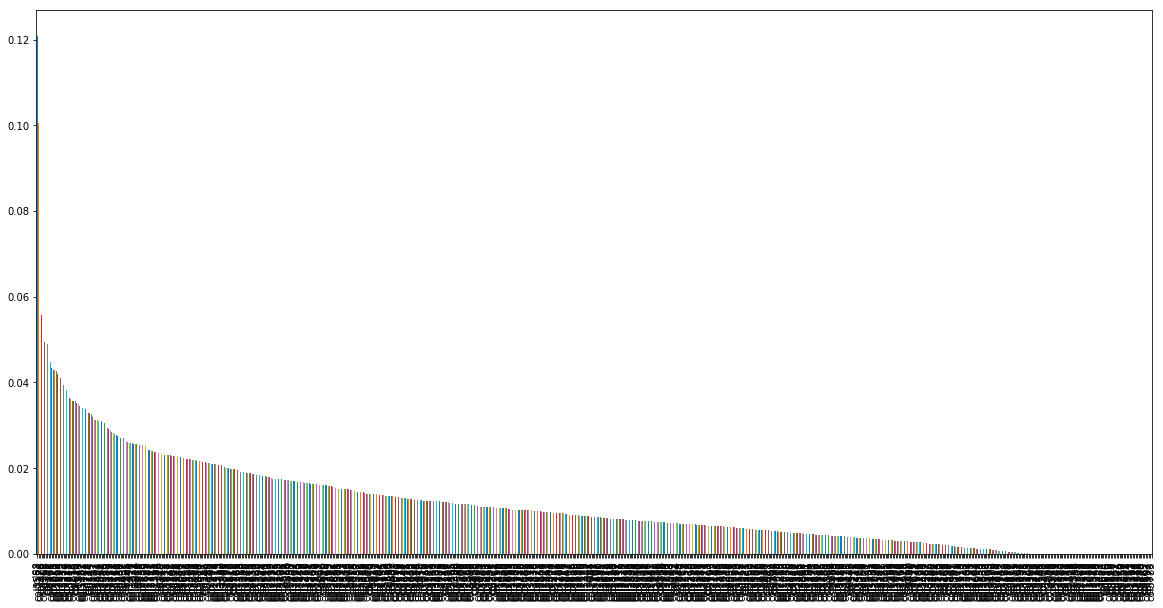

In [125]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import feather

tr =feather.read_dataframe("../data/input/tr_separate_type2.feather")
te = feather.read_dataframe("../data/input/te_separate_type2.feather")
del te["ID"],tr["Score"]


MI = mutual_info_regression(tr,score)
MI = pd.Series(MI)
MI.index = tr.columns
MI.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))



In [181]:

col = tr.columns[kbest_sel_.scores_>0.001]

In [177]:
tr.shape

(13731, 763)

In [129]:
# KBest : 抽出する特徴量の"数"を指定
kbest_sel_ = SelectKBest(mutual_info_regression, k=610)
kbest_sel_.fit(tr,score)
#print(kbest_sel_.get_support())
# Percentile : 抽出する特徴量の割合を指定
#percentile_sel_ = SelectPercentile(mutual_info_regression, percentile=80)

#print(len(percentile_sel_.get_support()))

SelectKBest(k=610,
      score_func=<function mutual_info_regression at 0x12c8219d8>)

In [172]:
tr =feather.read_dataframe("../data/input/tr_separate_type2.feather")
#percentile_sel_ = SelectPercentile(mutual_info_regression, percentile=60)
#percentile_sel_.fit(tr,score)
#rint(len(percentile_sel_.get_support()))

In [118]:
import torch as th
from torch.autograd import Variable as V
from torch import nn,optim
class NN(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()
        self.layer = nn.Sequential(
            nn.BatchNorm1d(input_dim),
            nn.Linear(input_dim, input_dim//2),
           # nn.Dropout(0.6),   
            #nn.ELU(),
            nn.ReLU(True),
#            nn.LeakyReLU(True),
           nn.BatchNorm1d(input_dim//2),
            nn.Linear(input_dim//2, input_dim//2),
            #nn.Dropout(0.5),       
           # nn.ELU(),
            nn.ReLU(True),
            #nn.LeakyReLU(True),   
          nn.BatchNorm1d(input_dim//2),
            nn.Linear(input_dim //2, 1))
        
        #nn.init.kaiming_normal_(self.layer.weight)
        #self.output = nn.Sigmoid()
        #self.output = nn.Softmax()
    def forward(self,x):
        x = self.layer(x)
        return x

INPUT_DIM,OUTPUT_DIM = trainx.shape[1],1
model = NN(INPUT_DIM, OUTPUT_DIM)

def create_batch1(x,y,batch_size):
    a = list(range(len(x)))
    np.random.shuffle(a)
    x = x[a]
    y = y[a]

    batch_x = [x[batch_size * i : (i+1)*batch_size,:].tolist() for i in range(len(x)//batch_size)]
    batch_y = [y[batch_size * i : (i+1)*batch_size].tolist() for i in range(len(x)//batch_size)]
    return batch_x, batch_y
opt= optim.Adam(model.parameters())
loss_f = nn.MSELoss()
losses = []

for i in range(10):
    batch_x,batch_y = create_batch1(trainx,trainy,64)
    run_loss = 0.
    for x,y in zip(batch_x,batch_y):
        opt.zero_grad()
        x,y = V(th.Tensor(x)).to(device),V(th.Tensor(y))
        output = model(x)
        print(output)
        loss = loss_f(output,y)
        loss.backward()
        opt.step()
        run_loss += loss.item()
        print(run_loss)
    losses.append(run_loss/len(trainx))
    print(run_loss/len(trainx))

NameError: name 'trainx' is not defined

In [3]:
import gokinjo

ModuleNotFoundError: No module named 'gokinjo'